In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
from matplotlib.pyplot import figure
from math import cos, sin, atan, radians, sqrt, degrees
import mplstereonet
import os

In [2]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1, bins = None): # function for histogram with box & whiskers plot
    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10,6))
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    anchored_text = AnchoredText(str(data.describe()), loc=2)
    ax_hist2.add_artist(anchored_text)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

In [3]:
def fracplot(x,y,z,df): # function for depthwise fracture frequency plot
    dip=df[x]
    depth=df[y]
    strike=df[z]
    Bin_size=round((max(depth)-min(depth))/5)
    plt.figure(figsize=(9,10))
    plt.subplot(1,3,1)
    plt.plot(dip, depth, '.', color='blue')
    plt.title("Dip Log", pad=20, size=15)
    plt.xlabel("Dip (degrees)"); plt.ylabel("Depth (m)")
    plt.grid(True)
    plt.gca().invert_yaxis()
    
    plt.subplot(1,3,2)
    plt.plot(strike, depth, '.', color='red')
    plt.title("Strike Log", pad=20, size=15)
    plt.xlabel("Strike (degrees)"); plt.ylabel("Depth (m)")
    plt.grid(True)
    plt.gca().invert_yaxis()

    plt.subplot(1,3,3)
    plt.hist(depth, bins=Bin_size,orientation="horizontal",edgecolor='black')
    plt.title("Fracture Intensity (per 5m)", pad=20, size=15)
    plt.xlabel("Depth (m)"); plt.ylabel("Frequency")
    plt.gca().invert_yaxis()
    
    plt.tight_layout(pad=1.0)
    plt.show()

In [4]:
def density_rose(x,y,df): # function for pole and rose plot
    strike=df[x]
    dip=df[y]
    bin_edges = np.arange(-5, 366, 10)
    number_of_strikes, bin_edges = np.histogram(strike, bin_edges)
    number_of_strikes[0] += number_of_strikes[-1]
    half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
    two_halves = np.concatenate([half, half])
    
    fig = plt.figure(figsize=(12,6))

    ax = fig.add_subplot(121, projection='stereonet')
    ax.pole(np.array(strike), np.array(dip), c='k', label='Pole of the Fractures')
    ax.density_contourf(np.array(strike), np.array(dip), measurement='poles', cmap='Reds')
    ax.set_title('Density coutour of the Fracture Poles', y=1.10, fontsize=15)
    ax.grid()
    
    ax = fig.add_subplot(122, projection='polar')
    ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
    ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
    ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)
    fig.tight_layout()
    plt.show()

In [5]:
def bplot(x,y,df): # function for box & whiskers plot
    fig = plt.figure(figsize=(8,6))
    bplot=sns.boxplot(x=x, y=y,data=df, linewidth=1,palette='OrRd_r')
    bplot.set_xlabel(x, fontsize=14)
    bplot.set_ylabel(y,fontsize=14)
    plt.show()

In [6]:
def file_export(x,y): # function to export file to desktop
    path = os.path.join(os.path.expanduser("~"), "Desktop", y)
    x.to_excel(path,index=False)

In [7]:
# Stress input parameters

SH = float(input('SH in psi: '))
Sh = float(input('Sh in psi: '))
Sv = float(input('Sv in psi: '))
Pp = float(input('Pore pressure in psi: '))
SHMax_azi=float(input('SHMax azimuth in degree (From North): '))
So=float(input('Inherent shear strength (cohesion) in psi: '))

SH in psi: 1100
Sh in psi: 900
Sv in psi: 800
Pore pressure in psi: 750
SHMax azimuth in degree (From North): 0
Inherent shear strength (cohesion) in psi: 0


In [8]:
# Assigning stress regime based on values

if SH>Sv>Sh:
    S1,S2,S3=SH,Sv,Sh
    alpha = radians(SHMax_azi)
    beta = radians(0)
    gamma = radians(90)
elif Sv>SH>Sh:
    S1,S2,S3=Sv,SH,Sh
    alpha = radians(SHMax_azi+90)
    beta = radians(90)
    gamma = radians(0)
elif SH>Sh>Sv:
    S1,S2,S3=SH,Sh,Sv
    alpha = radians(SHMax_azi)
    beta = radians(0)
    gamma = radians(0)
S = np.array([[S1, 0 ,0],[0,S2, 0],[0, 0, S3]])

In [9]:
# Calculating direction cosines for the principal stresses
A = np.array([[round(cos(alpha)*cos(beta), 5), round(sin(alpha)*cos(beta),5), round(-sin(beta),5)],[round(cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma), 5), round(sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma),5), round(cos(beta)*sin(gamma),5)],[round(cos(alpha)*sin(beta)*cos(gamma)+sin(alpha)*sin(gamma), 5), round(sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma),5), round(cos(beta)*cos(gamma),5)]])
temp = A.T.dot(S)
Sg = np.dot(temp, A)

In [10]:
def mohr_circle(x,y,z,df): # Function for Mohr cirle plot
    normal=df[x]
    shear=df[y]
    colour=df[z]
    
    angle=list(range(0,361,3))
    
    S1_marker=S1-Pp
    S2_marker=S2-Pp
    S3_marker=S3-Pp
    
    normal_S1S2 = (0.5 * (S1 + S2)) + (0.5 * (S1 - S2) * np.cos(np.deg2rad(2 * angle)))
    normal_eff_S1S2 = normal_S1S2 - Pp
    shear_S1S2 = 0.5 * (S1 - S2) * np.sin(np.deg2rad(2 * angle))
    
    normal_S1S3 = (0.5 * (S1 + S3)) + (0.5 * (S1 - S3) * np.cos(np.deg2rad(2 * angle)))
    normal_eff_S1S3 = normal_S1S3 - Pp
    shear_S1S3 = 0.5 * (S1 - S3) * np.sin(np.deg2rad(2 * angle))
    
    normal_S2S3 = (0.5 * (S3 + S2)) + (0.5 * (S3 - S2) * np.cos(np.deg2rad(2 * angle)))
    normal_eff_S2S3 = normal_S2S3 - Pp
    shear_S2S3 = 0.5 * (S3 - S2) * np.sin(np.deg2rad(2 * angle))
    
    mu_P50,mu_P10 = 0.6,1
    normal_env = np.linspace(0, max(normal_eff_S1S3), 10)
    shear_env_P50 = mu_P50 * normal_env+So
    shear_env_P10 = mu_P10 * normal_env+So
    
    plt.figure(figsize=(30,30))
    plt.plot(normal_env, shear_env_P50,linestyle='dashed')
    plt.plot(normal_env, shear_env_P10,color='red',linestyle='dashed')
    plt.legend(["Mu=0.6", "Mu=1"], loc ="upper left", fontsize=20)
    plt.plot(normal_eff_S1S2, shear_S1S2, color='green')
    plt.plot(normal_eff_S1S3,shear_S1S3, color='black')
    plt.plot(normal_eff_S2S3,shear_S2S3, color='green')
    
    plt.scatter(normal, shear, c=colour, s=20, cmap='gist_rainbow')
    plt.xticks([S1_marker, S2_marker, S3_marker,(S1_marker+100),(S1_marker+100)/2,0], ["σ1", "σ2", "σ3",str(S1_marker+100),str((S1_marker+100)/2),'0'], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Normal Stress',fontsize=18)
    plt.ylabel('Shear Stress',fontsize=18)
    plt.xlim(xmin=0)
    plt.ylim(ymin=0,ymax = max(shear_S1S3)+100)
    plt.colorbar(shrink=0.25, label='Fracture/ Fault Dip')
    plt.gca().set_aspect('equal')
    plt.show()

In [11]:
def normal(strike, dip, Sg=Sg,Pp=Pp): # function for calculating normal stress on fault planes
    Nn = np.array([round(-sin(strike)*sin(dip), 5), round(cos(strike)*sin(dip), 5), round(-cos(dip), 5)])
    totalStress = Sg.dot(Nn)
    Sn = totalStress.dot(Nn)
    Sn=Sn-Pp
    return(Sn)

In [12]:
def shear(strike, dip, Sg=Sg):# function for calculating shear stress on fault planes
    Nn = np.array([round(-sin(strike)*sin(dip), 5), round(cos(strike)*sin(dip), 5), round(-cos(dip), 5)])
    Ns = np.array([round(cos(strike), 5), round(sin(strike), 5), 0])
    Nd = np.array([round(-sin(strike)*cos(dip), 5), round(cos(strike)*cos(dip), 5), round(sin(dip), 5)])
    totalStress = Sg.dot(Nn)
    tau_d = totalStress.dot(Nd)**2  
    tau_s = totalStress.dot(Ns)**2
    tau = sqrt(tau_d + tau_s)
    return(tau)

#### input excel file should have 'Z', 'Dip azimuth','Dip angle','Confidence factor' columns. 'Z' is TVDSS in meters

In [13]:
# input dataset
fracture = pd.read_excel('Fracture_Data.xls') # input excel file
fracture.sort_values(by=['MD'],inplace = True)
fracture['Strike'] = np.where(fracture['Dip azimuth']<=270, fracture['Dip azimuth']+90, fracture['Dip azimuth']-90)
fracture['Depth'] = fracture.Z.abs()
fracture['strike_rad'] = np.deg2rad(fracture['Strike'])
fracture['dip_rad']=np.deg2rad(fracture['Dip angle'])

In [14]:
formation_no=int(input("No. of Formations: ")) # Input for number of formations

No. of Formations: 2


In [15]:
formation_lst=['None'] # function for list with formation name and depth
depth_lst=[0]
for i in range(formation_no):
    formation_name=input("Name of the Formation: ")
    formation_lst.append(formation_name.capitalize())
    formation_depth=float(input('Depth of '+formation_name+' in TVDSS: '))
    depth_lst.append(formation_depth)

Name of the Formation: A
Depth of A in TVDSS: 2700
Name of the Formation: B
Depth of B in TVDSS: 3100


In [16]:
def formation_fn(Depth): # function for formation assigning
    a=0
    for i in range (1,formation_no+1):
        if depth_lst[i]<= Depth:
            a=i
    return(formation_lst[a])

In [17]:
fracture['Formation']=fracture['Depth'].apply(formation_fn) # formation assignment to data

In [18]:
formation_wise=input('Run statistics Formation wise (Y/N): ') # User input for data interpretation length
if formation_wise.upper()=='Y':
    formation_name=input('Formation Name to run statistics: ')
    if formation_name.capitalize() in formation_lst:
        fracture=fracture[fracture['Formation']==formation_name.capitalize()]
    else:
        print('The input does not match with the Formation names provided' )
        exit()
else:
    fracture=fracture

Run statistics Formation wise (Y/N): N


In [19]:
dip_class=int(input("No. of dip classes: ")) # the number of dip classes to create

No. of dip classes: 4


In [20]:
dip_lst=[] # list for all individual dip values
x=90/dip_class
while x<=90:
    dip_lst.append(x)
    x=x+(90/dip_class)

In [21]:
def dip_fn(Dip): # function on creating dip classes
    a=0
    for i in range (0,len(dip_lst)):
        if Dip < dip_lst[i]:
            a=dip_lst[i]
            return(a)

In [22]:
fracture['Dip_Class']=fracture['Dip angle'].apply(dip_fn) # creating dip classes

In [23]:
fracture['normal_stress'] = fracture.apply(lambda x: normal(x['strike_rad'], x['dip_rad']), axis=1) # normal stress classes for all faults

In [24]:
fracture['shear_stress'] = fracture.apply(lambda x: shear(x['strike_rad'], x['dip_rad']), axis=1)# shear stress classes for all faults

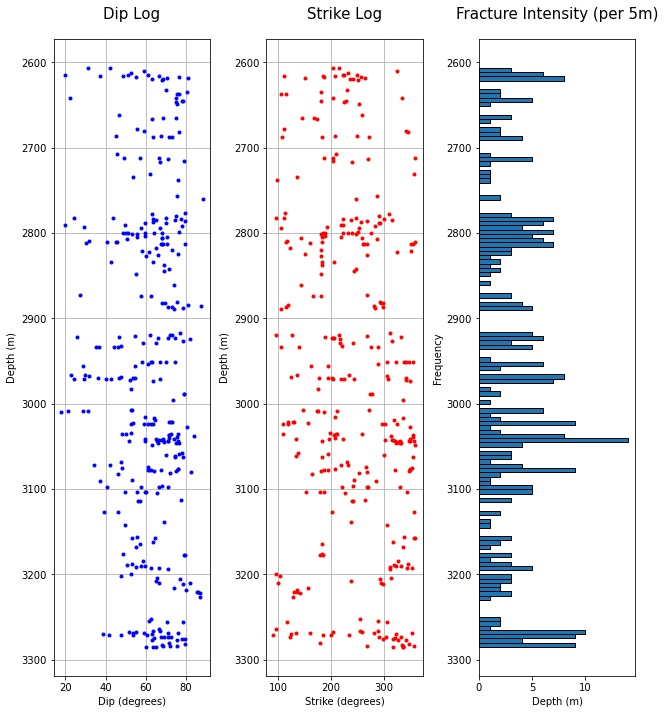

In [25]:
fracplot('Dip angle','Depth','Strike',fracture) # Depthwise fracture plots

/Users/shubhodipkonar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shubhodipkonar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


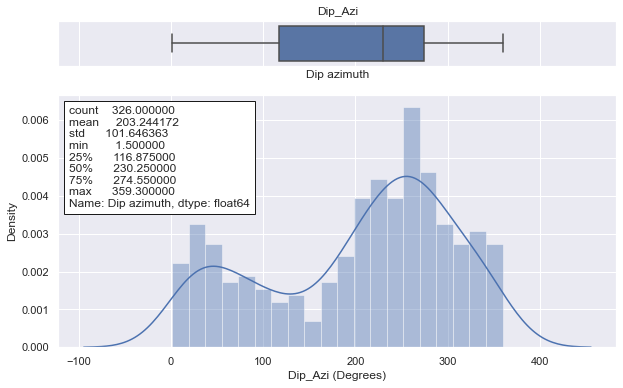

In [26]:
histogram_boxplot(fracture['Dip azimuth'], bins = 20, title="Dip_Azi", xlabel="Dip_Azi (Degrees)") # dip azimuth histogram

/Users/shubhodipkonar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shubhodipkonar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


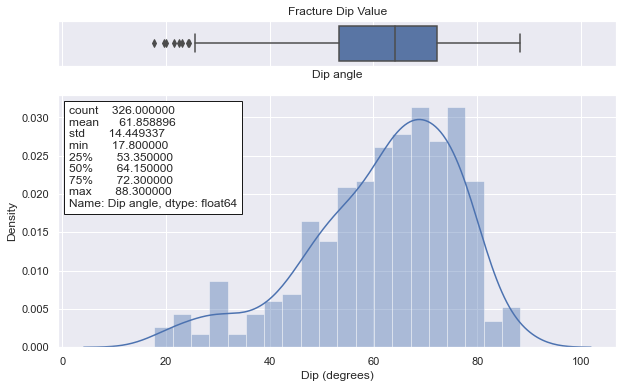

In [27]:
histogram_boxplot(fracture['Dip angle'], bins = 20, title="Fracture Dip Value", xlabel="Dip (degrees)") # dip histogram

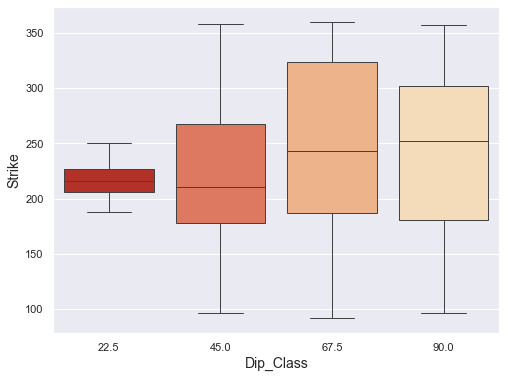

In [28]:
bplot('Dip_Class',"Strike",fracture) #strike distribution for dip classes

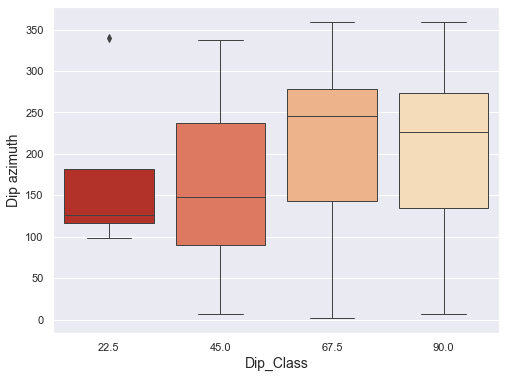

In [44]:
bplot('Dip_Class',"Dip azimuth",fracture) #dip azimuth distribution for dip classes

<ipython-input-4-3e360327a3b0>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


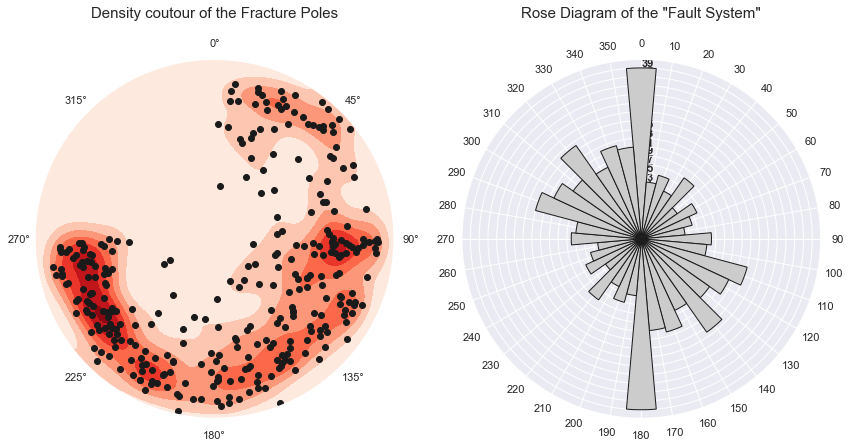

In [29]:
density_rose('Strike','Dip angle',fracture) # density contour of poles and rose diagram

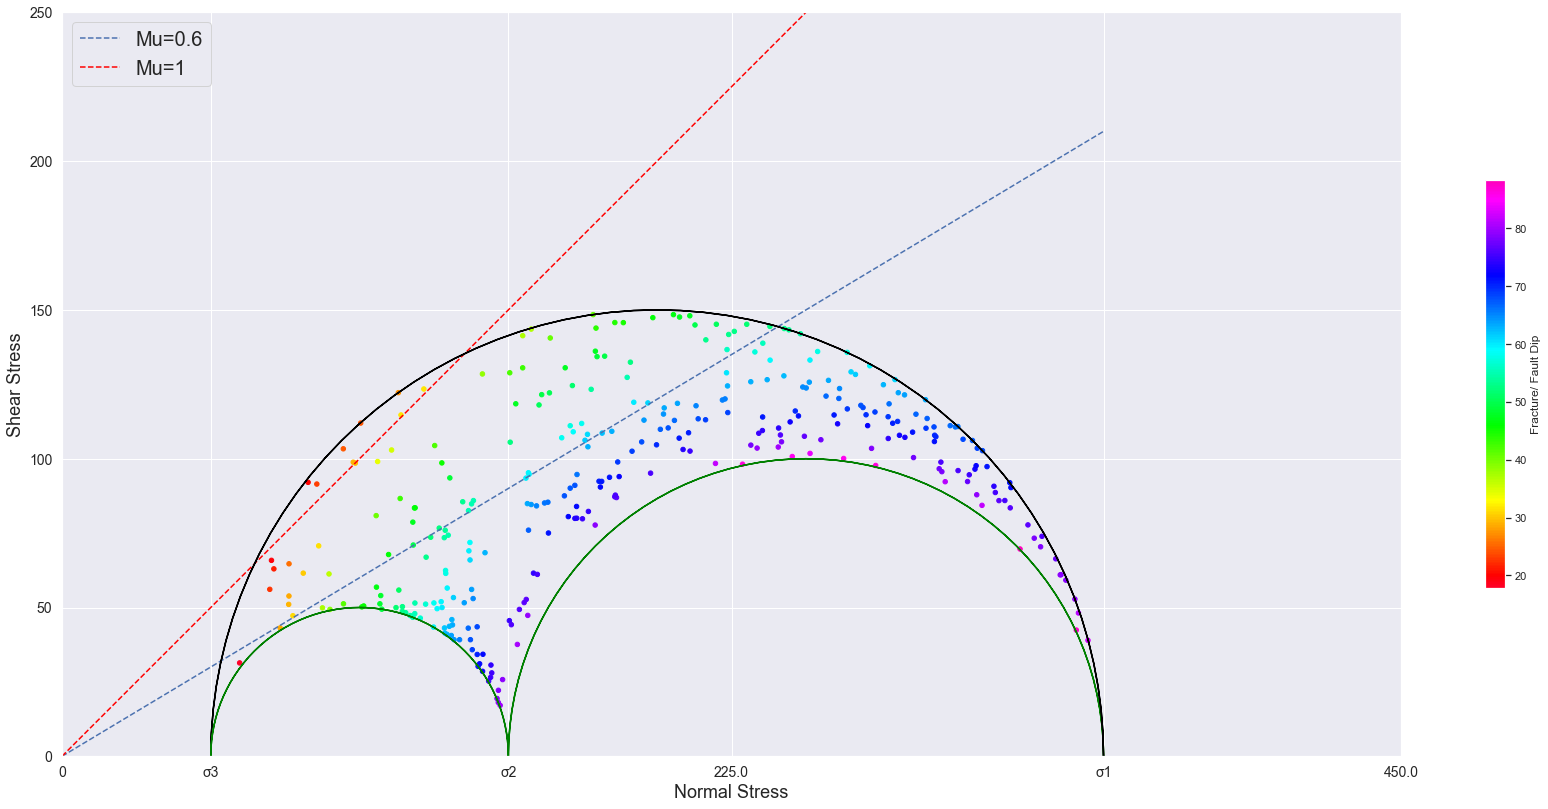

In [30]:
mohr_circle('normal_stress','shear_stress','Dip angle',fracture) # mohr circle coloured by dip angle

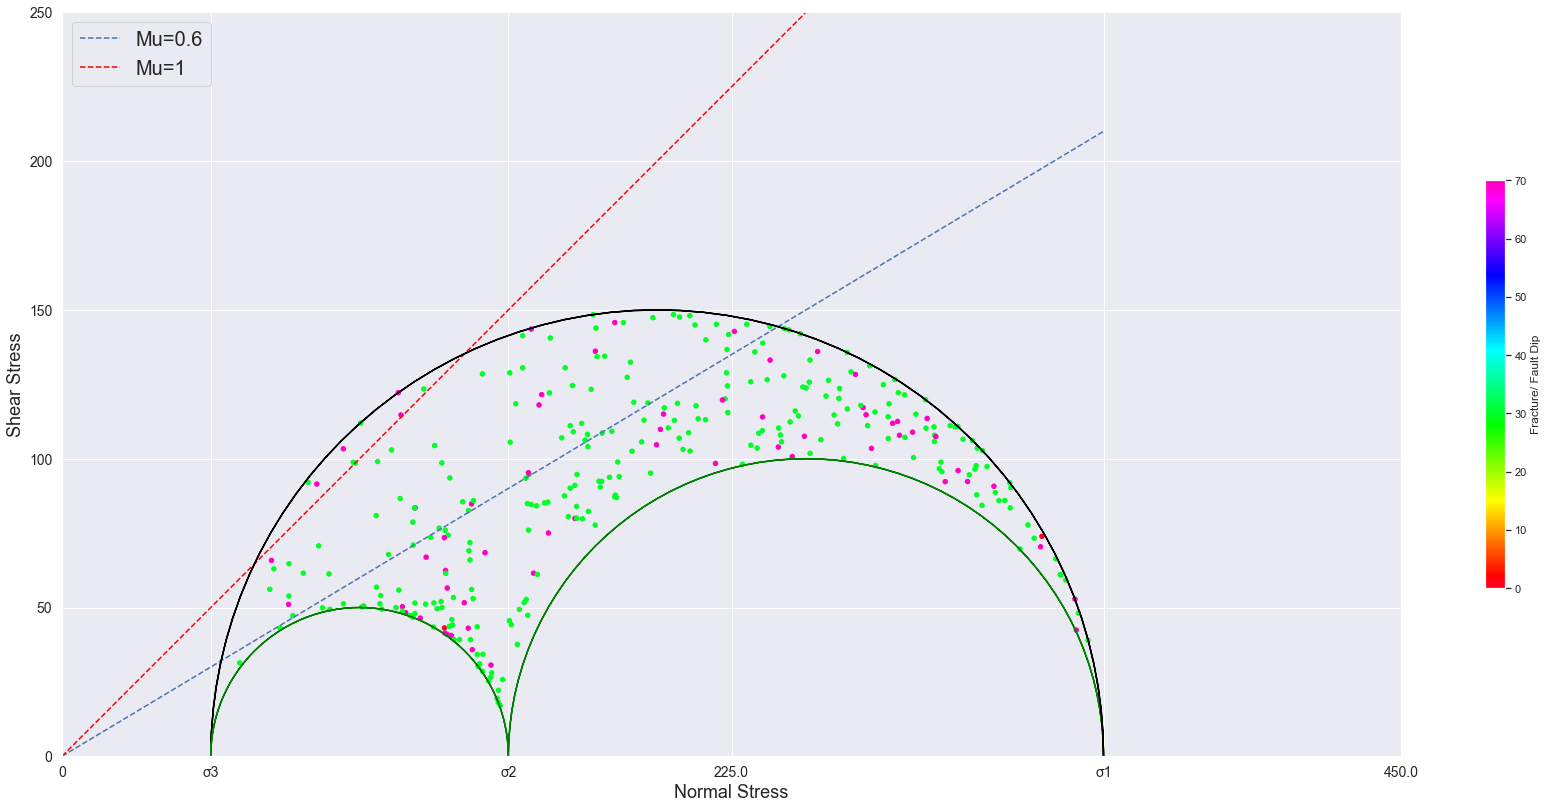

In [31]:
mohr_circle('normal_stress','shear_stress','Confidence factor',fracture)# mohr circle coloured by confidence factor

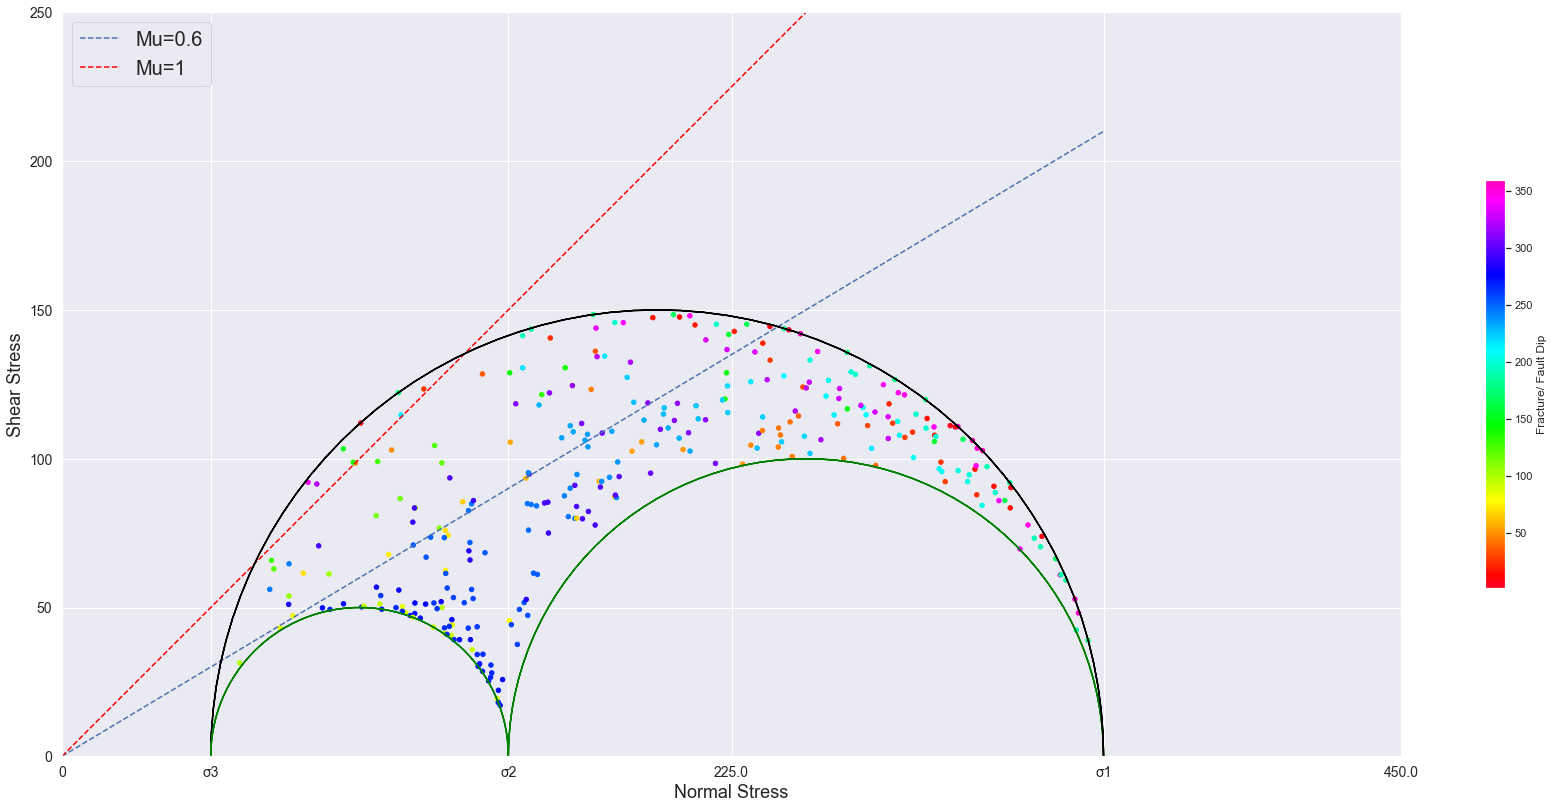

In [32]:
mohr_circle('normal_stress','shear_stress','Dip azimuth',fracture)# mohr circle coloured by dip azimuth

In [33]:
fracture['Mu'] = fracture['shear_stress']/fracture['normal_stress'] # calculate mu for all faults

In [34]:
fracture[['Dip angle','Dip azimuth','Strike','Mu']].describe() # Statistics calculated for all the important parameters

,Dip angle,Dip azimuth,Strike,Mu
count,326.000000,326.000000,326.000000,326.000000
mean,61.858896,203.244172,240.790184,0.499471
std,14.449337,101.646363,76.448837,0.194064
min,17.800000,1.500000,91.500000,0.113011
25%,53.350000,116.875000,183.150000,0.379880
50%,64.150000,230.250000,241.900000,0.481192
75%,72.300000,274.550000,311.400000,0.599248
max,88.300000,359.300000,360.000000,1.115423


In [35]:
fracture_export=fracture[['MD', 'Mu']] # prepare data for export

In [36]:
fracture_export.drop_duplicates(subset=['MD'], keep='first', inplace=True) # drop duplicates

<ipython-input-36-4f36c20938f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fracture_export.drop_duplicates(subset=['MD'], keep='first', inplace=True) # drop duplicates


In [37]:
# Fault frequency data export
Bins=round((max(fracture['Depth'])-min(fracture['Depth']))/5)
frac_frequency = pd.DataFrame()
frequency=np.histogram(fracture['Depth'], bins=Bins)
frac_frequency['Depth']=np.convolve(frequency[1], np.ones(2), 'valid') / 2
frac_frequency['Frequency']=frequency[0]

In [38]:
# Fault frequency based on dip class export
for i in range (0,len(dip_lst)):
    dip_frequency_export=pd.DataFrame()
    frac_dip_frequency=fracture[fracture['Dip_Class']==dip_lst[i]]
    Bins=round((max(frac_dip_frequency['Depth'])-min(frac_dip_frequency['Depth']))/5)
    dip_frequency=np.histogram(frac_dip_frequency['Depth'], bins=Bins)
    dip_frequency_export['Depth']=np.convolve(dip_frequency[1], np.ones(2), 'valid') / 2
    dip_frequency_export['Frequency']=dip_frequency[0]
    file_export(dip_frequency_export,str(dip_lst[i])+'.xls')

In [39]:
file_export(frac_frequency,"Frac_Frequency.xls") # export fault frequency data

In [40]:
file_export(fracture_export,"Critical_frac_data.xls") # export Mu data

In [41]:
strike_min=float(input("Strike range for fracture frequency (lower limit): ")) # input for strike range

Strike range for fracture frequency (lower limit): 89


In [42]:
strike_max=float(input("Strike range for fracture frequency (higher limit): "))# input for strike range

Strike range for fracture frequency (higher limit): 180


In [43]:
# export data within the strike range
strike_frequency_export=pd.DataFrame()
frac_strike_frequency=fracture[fracture['Strike'].between(min(strike_min,strike_max),max(strike_min,strike_max))]
Bins_strike=round((max(frac_strike_frequency['Depth'])-min(frac_strike_frequency['Depth']))/5)
strike_frequency=np.histogram(frac_strike_frequency['Depth'], bins=Bins_strike)
strike_frequency_export['Depth']=np.convolve(strike_frequency[1], np.ones(2), 'valid') / 2
strike_frequency_export['Frequency']=strike_frequency[0]
file_export(strike_frequency_export,'Strike_Frequency.xls')